In [5]:
# سلول ۱: نصب و import کتابخانه‌های ضروری

# نصب کتابخانه‌های لازم (اگر نصب نیستند)
!pip install wordcloud -q
!pip install seaborn -q

# import کتابخانه‌ها
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import requests
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# تنظیمات نمایش
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ کتابخانه‌ها با موفقیت import شدند")

✅ کتابخانه‌ها با موفقیت import شدند


In [7]:
# سلول ۲: تعریف توابع و بارگذاری داده‌ها

def load_yelp_reviews_sample(file_path, n_samples=10000):
    """بارگذاری نمونه‌ای از دیتاست Yelp"""
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= n_samples:
                break
            try:
                review = json.loads(line)
                data.append({
                    'text': review.get('text', ''),
                    'stars': review.get('stars', 0),
                    'review_id': review.get('review_id', ''),
                    'business_id': review.get('business_id', '')
                })
            except:
                continue
    
    df = pd.DataFrame(data)
    df['label'] = df['stars'].apply(lambda x: 'positive' if x >= 3 else 'negative')
    return df

# بارگذاری داده‌ها
print("📥 در حال بارگذاری داده‌های Yelp...")
df_yelp = load_yelp_reviews_sample('K:\\ZNU\\Yelp JSON\\yelp_dataset\\yelp_academic_dataset_review.json', n_samples=10000)
print(f"✅ {len(df_yelp)} کامنت بارگذاری شد")

# نمایش اطلاعات اولیه
print(f"\n📊 اطلاعات دیتاست:")
print(f"   ستون‌ها: {df_yelp.columns.tolist()}")
print(f"   شکل دیتافریم: {df_yelp.shape}")

📥 در حال بارگذاری داده‌های Yelp...
✅ 10000 کامنت بارگذاری شد

📊 اطلاعات دیتاست:
   ستون‌ها: ['text', 'stars', 'review_id', 'business_id', 'label']
   شکل دیتافریم: (10000, 5)


📈 توزیع ستاره‌ها:
stars
1.0    1079
2.0     763
3.0    1139
4.0    2574
5.0    4445
Name: count, dtype: int64

🏷️ توزیع لیبل‌ها:
label
positive    8158
negative    1842
Name: count, dtype: int64


C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2905845667.py:34: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2905845667.py:34: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


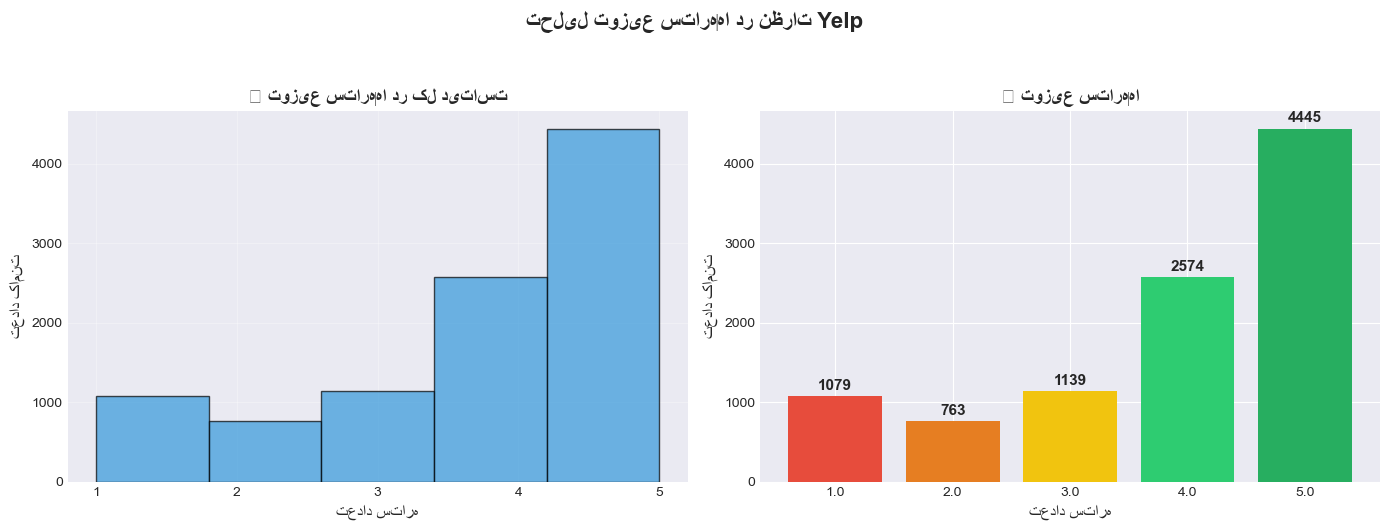


⭐ آمار ستاره‌ها:
میانگین ستاره‌ها: 3.85
میانه ستاره‌ها: 4.00
انحراف معیار: 1.35


In [8]:
# سلول ۳: تحلیل توزیع ستاره‌ها و لیبل‌ها

print("📈 توزیع ستاره‌ها:")
print(df_yelp['stars'].value_counts().sort_index())

print("\n🏷️ توزیع لیبل‌ها:")
print(df_yelp['label'].value_counts())

# نمودار توزیع ستاره‌ها
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# هیستوگرام ستاره‌ها
axes[0].hist(df_yelp['stars'], bins=5, edgecolor='black', alpha=0.7, color='#3498db')
axes[0].set_title('📊 توزیع ستاره‌ها در کل دیتاست', fontsize=14, fontweight='bold')
axes[0].set_xlabel('تعداد ستاره', fontsize=12)
axes[0].set_ylabel('تعداد کامنت', fontsize=12)
axes[0].set_xticks(range(1, 6))
axes[0].grid(True, alpha=0.3)

# نمودار میله‌ای ستاره‌ها
star_counts = df_yelp['stars'].value_counts().sort_index()
colors = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71', '#27ae60']
axes[1].bar(star_counts.index.astype(str), star_counts.values, color=colors)
axes[1].set_title('⭐ توزیع ستاره‌ها', fontsize=14, fontweight='bold')
axes[1].set_xlabel('تعداد ستاره', fontsize=12)
axes[1].set_ylabel('تعداد کامنت', fontsize=12)

# اضافه کردن اعداد
for i, count in enumerate(star_counts.values):
    axes[1].text(i, count + max(star_counts.values)*0.01, str(count), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.suptitle('تحلیل توزیع ستاره‌ها در نظرات Yelp', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

print("\n⭐ آمار ستاره‌ها:")
print(f"میانگین ستاره‌ها: {df_yelp['stars'].mean():.2f}")
print(f"میانه ستاره‌ها: {df_yelp['stars'].median():.2f}")
print(f"انحراف معیار: {df_yelp['stars'].std():.2f}")

In [9]:
# سلول ۴: تقسیم داده‌ها

# تقسیم به train و temp
df_train, df_temp = train_test_split(
    df_yelp, 
    test_size=0.3, 
    random_state=42, 
    stratify=df_yelp['label']
)

# تقسیم temp به test و validation
df_test, df_validation = train_test_split(
    df_temp, 
    test_size=0.5, 
    random_state=42, 
    stratify=df_temp['label']
)

print("✂️ تقسیم داده‌ها:")
print(f"   Training set: {len(df_train)} نمونه ({len(df_train)/len(df_yelp)*100:.1f}%)")
print(f"   Test set: {len(df_test)} نمونه ({len(df_test)/len(df_yelp)*100:.1f}%)")
print(f"   Validation set: {len(df_validation)} نمونه ({len(df_validation)/len(df_yelp)*100:.1f}%)")

✂️ تقسیم داده‌ها:
   Training set: 7000 نمونه (70.0%)
   Test set: 1500 نمونه (15.0%)
   Validation set: 1500 نمونه (15.0%)


C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\3870579275.py:27: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\3870579275.py:27: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\3870579275.py:27: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.

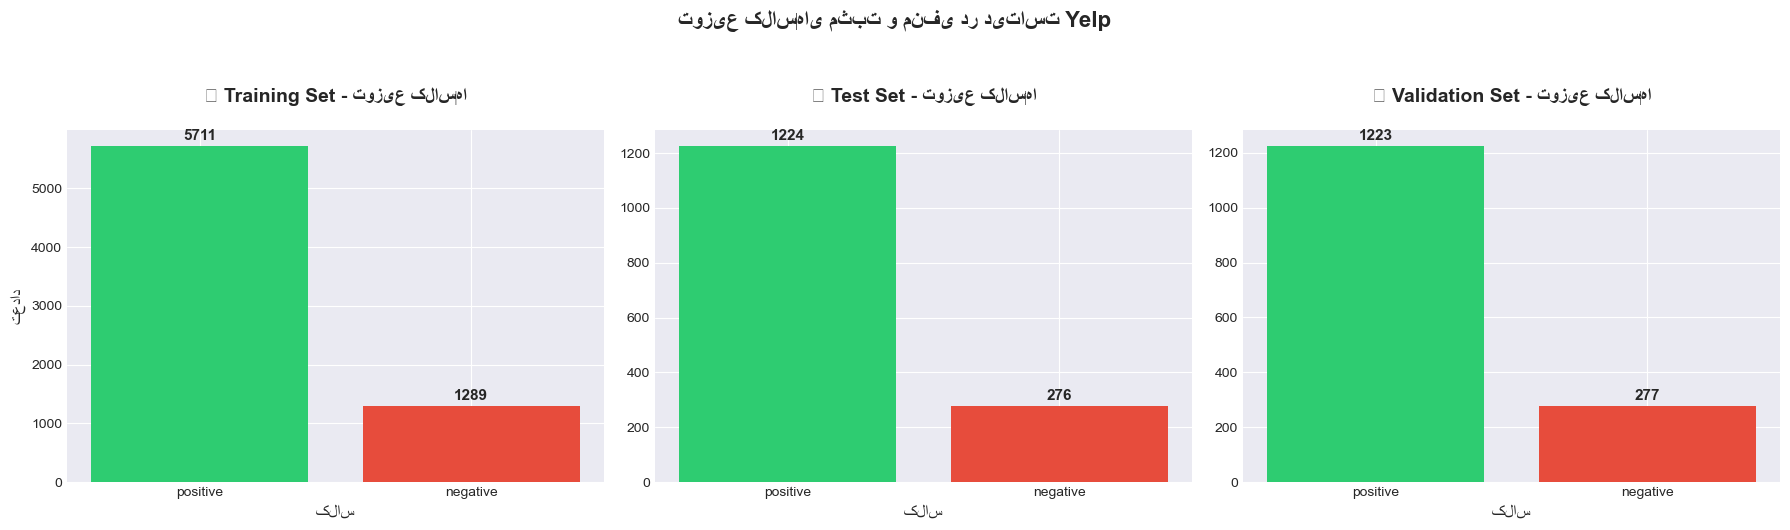


📊 توزیع دقیق کلاس‌ها:

Training set:
label
positive    5711
negative    1289
Name: count, dtype: int64
نسبت مثبت: 81.6%

Test set:
label
positive    1224
negative     276
Name: count, dtype: int64
نسبت مثبت: 81.6%

Validation set:
label
positive    1223
negative     277
Name: count, dtype: int64
نسبت مثبت: 81.5%


In [10]:
# سلول ۵: تحلیل توزیع کلاس‌ها در مجموعه‌های مختلف

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = {'positive': '#2ecc71', 'negative': '#e74c3c'}

# لیست مجموعه‌ها و عنوان‌ها
datasets = [('Training', df_train), ('Test', df_test), ('Validation', df_validation)]
titles = ['📚 Training Set', '🧪 Test Set', '✅ Validation Set']

for idx, (name, df_set) in enumerate(datasets):
    counts = df_set['label'].value_counts()
    axes[idx].bar(counts.index, counts.values, 
                 color=[colors[label] for label in counts.index])
    axes[idx].set_title(f'{titles[idx]} - توزیع کلاس‌ها', 
                       fontsize=14, fontweight='bold', pad=20)
    axes[idx].set_xlabel('کلاس', fontsize=12)
    if idx == 0:
        axes[idx].set_ylabel('تعداد', fontsize=12)
    
    # اضافه کردن اعداد
    for i, count in enumerate(counts.values):
        axes[idx].text(i, count + max(counts.values)*0.01, str(count), 
                      ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.suptitle('توزیع کلاس‌های مثبت و منفی در دیتاست Yelp', 
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# نمایش دقیق اعداد
print("\n📊 توزیع دقیق کلاس‌ها:")
for name, df_set in datasets:
    print(f"\n{name} set:")
    counts = df_set['label'].value_counts()
    print(counts)
    pos_ratio = len(df_set[df_set['label']=='positive'])/len(df_set)*100
    print(f"نسبت مثبت: {pos_ratio:.1f}%")

In [11]:
# سلول ۶: پیش‌پردازش متن و ایجاد ابر کلمات

# استاپ‌وردهای انگلیسی
english_stopwords = set([
    'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'that', 'was',
    'for', 'on', 'with', 'as', 'at', 'by', 'this', 'be', 'are', 'from',
    'or', 'have', 'an', 'they', 'which', 'you', 'we', 'he', 'she', 'his',
    'her', 'my', 'your', 'our', 'their', 'i', 'me', 'him', 'us', 'them'
])

def preprocess_english_text(text):
    """پیش‌پردازش متن انگلیسی"""
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # حذف علائم نگارشی
    text = re.sub(r'\d+', ' ', text)      # حذف اعداد
    text = re.sub(r'\s+', ' ', text)      # حذف فاصله اضافی
    return text.strip()

def remove_stopwords(text, stopwords):
    """حذف کلمات پرتکرار"""
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords and len(word) > 2]
    return ' '.join(filtered_words)

# پیش‌پردازش
print("⚙️ در حال پیش‌پردازش متن‌ها...")
df_train['processed_text'] = df_train['text'].apply(preprocess_english_text)
df_train['clean_text'] = df_train['processed_text'].apply(
    lambda x: remove_stopwords(x, english_stopwords)
)
print("✅ پیش‌پردازش تکمیل شد")

⚙️ در حال پیش‌پردازش متن‌ها...
✅ پیش‌پردازش تکمیل شد


C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2016674882.py:31: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


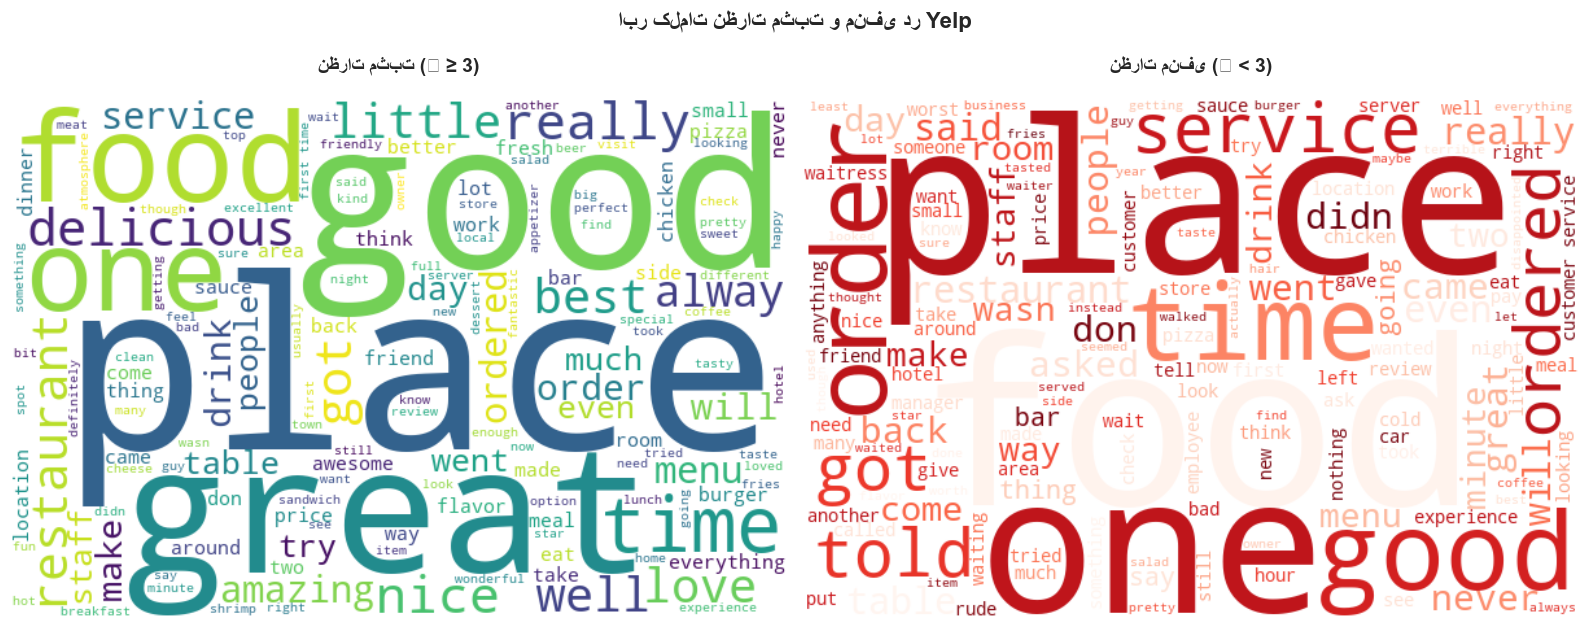


🔤 پرتکرارترین کلمات در هر کلاس:

🏷️ کلاس positive:
   'but': 4320 بار
   'had': 3411 بار
   'good': 3157 بار
   'great': 3122 بار
   'were': 3097 بار
   'food': 2871 بار
   'place': 2816 بار
   'not': 2632 بار
   'very': 2469 بار
   'there': 2086 بار

🏷️ کلاس negative:
   'not': 1452 بار
   'but': 1316 بار
   'had': 1043 بار
   'were': 989 بار
   'food': 840 بار
   'there': 778 بار
   'out': 659 بار
   'place': 628 بار
   'when': 602 بار
   'just': 599 بار


In [12]:
# سلول ۷: ایجاد و نمایش ابر کلمات

# ایجاد ابر کلمات
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

classes = ['positive', 'negative']
class_titles = ['نظرات مثبت (⭐ ≥ 3)', 'نظرات منفی (⭐ < 3)']

for i, (class_label, title) in enumerate(zip(classes, class_titles)):
    # ترکیب متن‌های کلاس
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['clean_text'])
    
    # ایجاد ابر کلمات
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        max_words=150,
        contour_width=1,
        contour_color='steelblue',
        colormap='viridis' if class_label == 'positive' else 'Reds'
    ).generate(class_texts)
    
    # رسم
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(title, fontsize=14, fontweight='bold', pad=20)
    axes[i].axis('off')

plt.suptitle('ابر کلمات نظرات مثبت و منفی در Yelp', 
             fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# نمایش پرتکرارترین کلمات
print("\n🔤 پرتکرارترین کلمات در هر کلاس:")
for class_label in classes:
    class_texts = ' '.join(df_train[df_train['label'] == class_label]['clean_text'])
    words = class_texts.split()
    word_counts = Counter(words)
    
    print(f"\n🏷️ کلاس {class_label}:")
    top_words = word_counts.most_common(10)
    for word, count in top_words:
        print(f"   '{word}': {count} بار")

C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2302676630.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(box_data, labels=classes, patch_artist=True,
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2302676630.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(box_data, labels=classes, patch_artist=True,
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2302676630.py:50: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2302676630.py:50: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\2302676630.py:50: UserWarning: Glyph

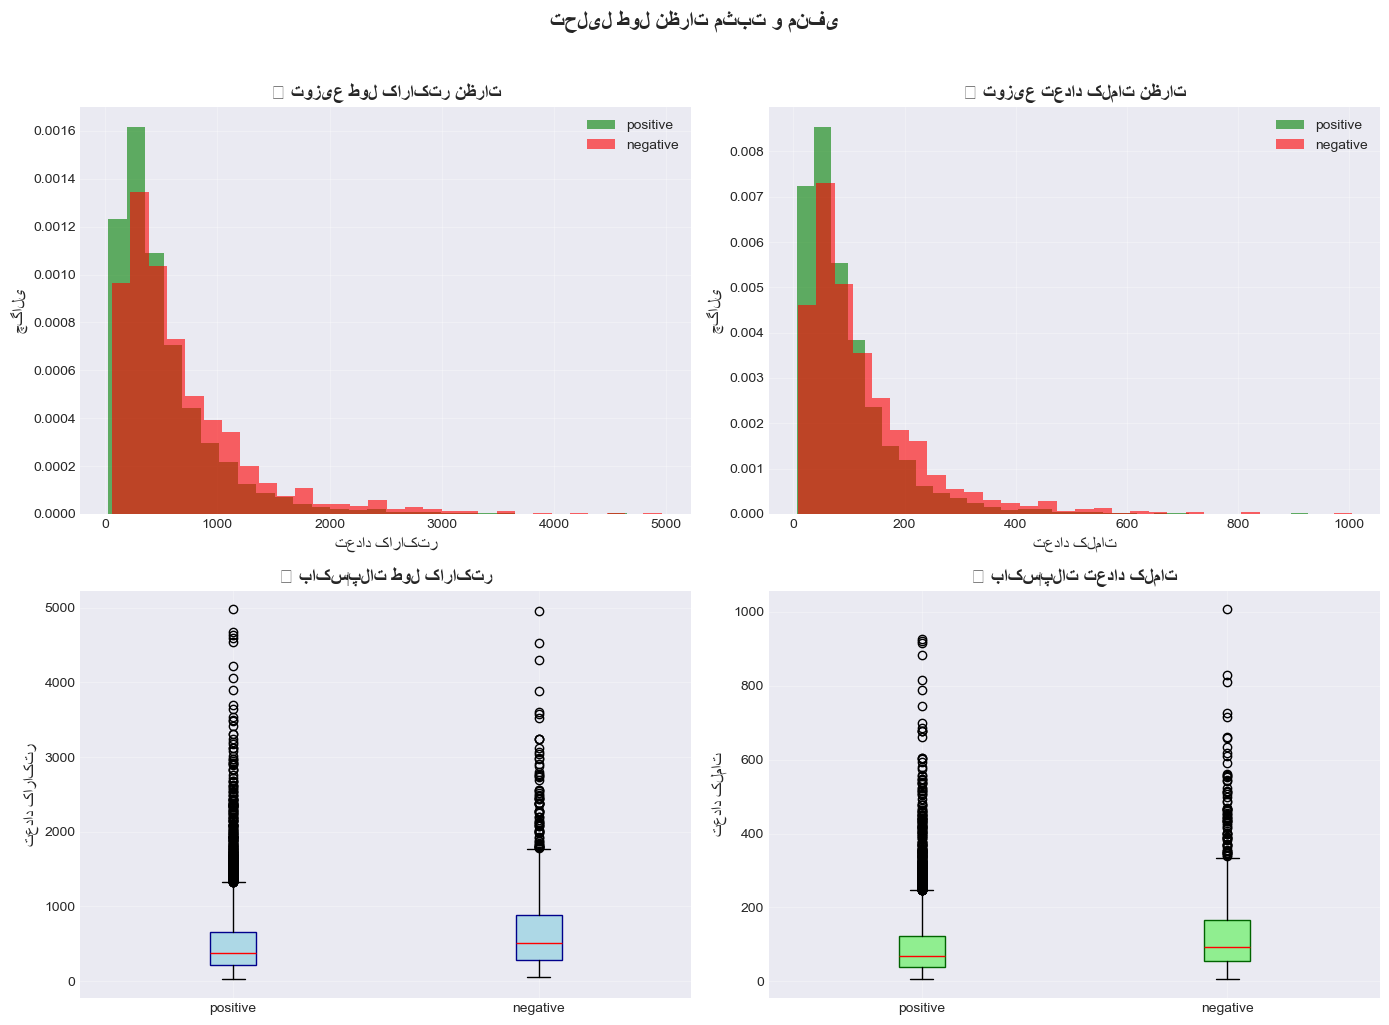


📊 آمار طول نظرات:

🏷️ کلاس positive:
   میانگین طول کاراکتر: 521
   میانه طول کاراکتر: 380
   میانگین تعداد کلمات: 96
   میانه تعداد کلمات: 69

🏷️ کلاس negative:
   میانگین طول کاراکتر: 687
   میانه طول کاراکتر: 505
   میانگین تعداد کلمات: 128
   میانه تعداد کلمات: 93


In [13]:
# سلول ۸: تحلیل طول نظرات

# محاسبه طول
df_train['text_length'] = df_train['text'].apply(len)
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# هیستوگرام طول کاراکتر
for class_label, color in zip(classes, ['green', 'red']):
    class_data = df_train[df_train['label'] == class_label]
    axes[0, 0].hist(class_data['text_length'], bins=30, alpha=0.6, 
                    label=class_label, density=True, color=color)
axes[0, 0].set_title('📏 توزیع طول کاراکتر نظرات', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('تعداد کاراکتر', fontsize=12)
axes[0, 0].set_ylabel('چگالی', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# هیستوگرام تعداد کلمات
for class_label, color in zip(classes, ['green', 'red']):
    class_data = df_train[df_train['label'] == class_label]
    axes[0, 1].hist(class_data['word_count'], bins=30, alpha=0.6, 
                    label=class_label, density=True, color=color)
axes[0, 1].set_title('📝 توزیع تعداد کلمات نظرات', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('تعداد کلمات', fontsize=12)
axes[0, 1].set_ylabel('چگالی', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# باکس‌پلات طول کاراکتر
box_data = [df_train[df_train['label'] == label]['text_length'] for label in classes]
axes[1, 0].boxplot(box_data, labels=classes, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='darkblue'),
                   medianprops=dict(color='red'))
axes[1, 0].set_title('📦 باکس‌پلات طول کاراکتر', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('تعداد کاراکتر', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# باکس‌پلات تعداد کلمات
box_data = [df_train[df_train['label'] == label]['word_count'] for label in classes]
axes[1, 1].boxplot(box_data, labels=classes, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                   medianprops=dict(color='red'))
axes[1, 1].set_title('📦 باکس‌پلات تعداد کلمات', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('تعداد کلمات', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('تحلیل طول نظرات مثبت و منفی', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# آمار طول نظرات
print("\n📊 آمار طول نظرات:")
for class_label in classes:
    class_data = df_train[df_train['label'] == class_label]
    print(f"\n🏷️ کلاس {class_label}:")
    print(f"   میانگین طول کاراکتر: {class_data['text_length'].mean():.0f}")
    print(f"   میانه طول کاراکتر: {class_data['text_length'].median():.0f}")
    print(f"   میانگین تعداد کلمات: {class_data['word_count'].mean():.0f}")
    print(f"   میانه تعداد کلمات: {class_data['word_count'].median():.0f}")

🧪 ارزیابی کلاسیفایر تصادفی (Random Classifier)

📊 نتایج کلاسیفایر تصادفی:
   🎯 دقت کلی (Accuracy): 0.4693
   📐 دقت طبقه‌بندی (Precision): 0.6812
   🔍 فراخوانی (Recall): 0.4693
   ⚖️ F1-Score: 0.5272

📋 گزارش کامل طبقه‌بندی:
              precision    recall  f1-score   support

    negative       0.17      0.47      0.25       276
    positive       0.80      0.47      0.59      1224

    accuracy                           0.47      1500
   macro avg       0.48      0.47      0.42      1500
weighted avg       0.68      0.47      0.53      1500


🎲 ماتریس درهم‌ریختگی:
[[574 650]
 [146 130]]


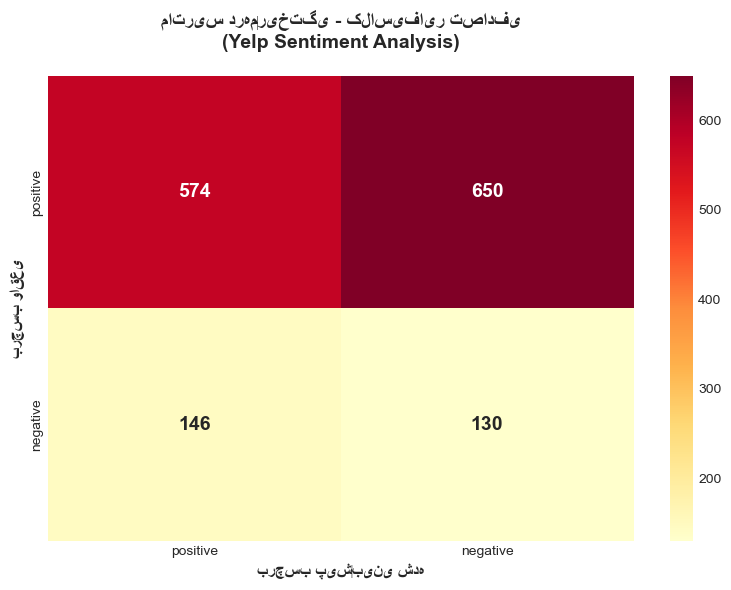


📝 جزئیات ماتریس:
   True Negative (TN):  574 - درست منفی
   False Positive (FP): 650 - غلط مثبت
   False Negative (FN): 146 - غلط منفی
   True Positive (TP):  130 - درست مثبت


In [14]:
# سلول ۹: ارزیابی کلاسیفایر تصادفی

print("="*70)
print("🧪 ارزیابی کلاسیفایر تصادفی (Random Classifier)")
print("="*70)

# برچسب‌گذاری تصادفی
y_true = df_test['label'].tolist()
classes_list = df_test['label'].unique().tolist()
y_pred_random = [random.choice(classes_list) for _ in range(len(df_test))]

# محاسبه معیارها
accuracy = accuracy_score(y_true, y_pred_random)
precision = precision_score(y_true, y_pred_random, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred_random, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred_random, average='weighted', zero_division=0)

print(f"\n📊 نتایج کلاسیفایر تصادفی:")
print(f"   🎯 دقت کلی (Accuracy): {accuracy:.4f}")
print(f"   📐 دقت طبقه‌بندی (Precision): {precision:.4f}")
print(f"   🔍 فراخوانی (Recall): {recall:.4f}")
print(f"   ⚖️ F1-Score: {f1:.4f}")

# گزارش کامل
print("\n📋 گزارش کامل طبقه‌بندی:")
print(classification_report(y_true, y_pred_random, 
                           target_names=['negative', 'positive'],
                           zero_division=0))

# ماتریس درهم‌ریختگی
cm = confusion_matrix(y_true, y_pred_random, labels=classes_list)
print("\n🎲 ماتریس درهم‌ریختگی:")
print(cm)

# نمایش گرافیکی ماتریس
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=classes_list,
            yticklabels=classes_list,
            annot_kws={'size': 14, 'weight': 'bold'})
plt.xlabel('برچسب پیش‌بینی شده', fontsize=12, fontweight='bold')
plt.ylabel('برچسب واقعی', fontsize=12, fontweight='bold')
plt.title('ماتریس درهم‌ریختگی - کلاسیفایر تصادفی\n(Yelp Sentiment Analysis)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# جزئیات ماتریس
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    print(f"\n📝 جزئیات ماتریس:")
    print(f"   True Negative (TN):  {tn} - درست منفی")
    print(f"   False Positive (FP): {fp} - غلط مثبت")
    print(f"   False Negative (FN): {fn} - غلط منفی")
    print(f"   True Positive (TP):  {tp} - درست مثبت")


📈 همبستگی بین ستاره‌ها و طول نظرات:
   ضریب همبستگی: -0.1654
   📉 رابطه منفی ضعیف: نظرات با ستاره کمتر کمی طولانی‌تر هستند


C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\542281491.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\AppData\Local\Temp\ipykernel_8724\542281491.py:39: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Amir\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


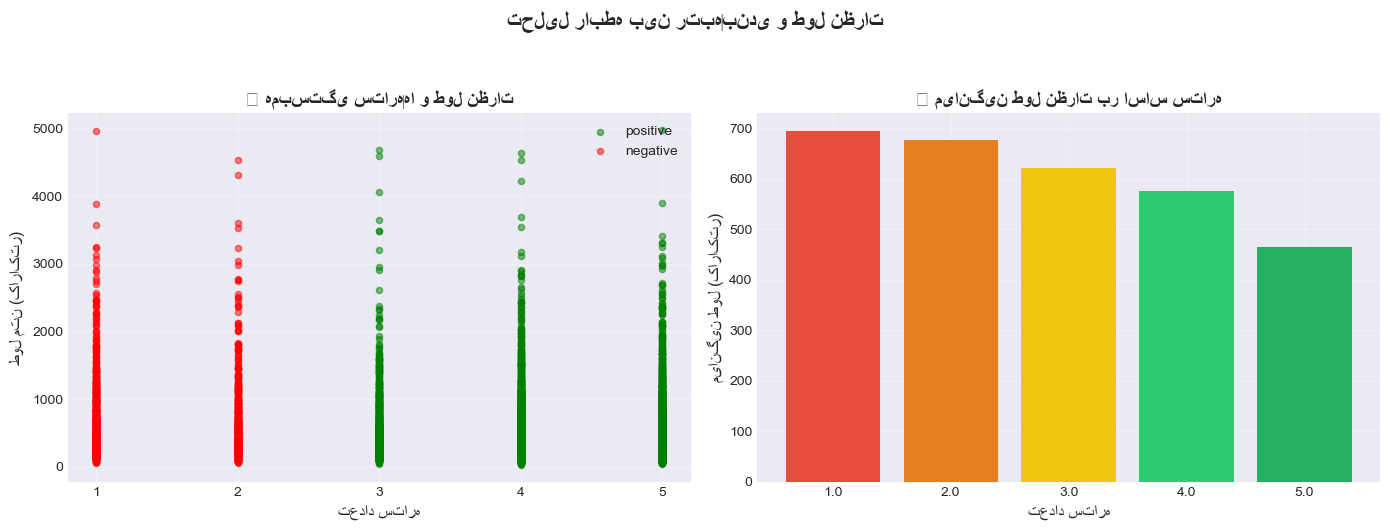


🔍 نمونه‌هایی از نظرات مثبت و منفی

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🏷️ کلاس POSITIVE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📄 نمونه 1 (⭐ 4.0 ستاره):
   I'm in town for an OB/GYN conference and really wanted to explore the local gems - oh Yelp you make travel so much better.  I was on my way to grab lu...
   📏 طول: 646 کاراکتر
   🔤 کلمات کلیدی: [('and', 6), ('to', 6), ('i', 6), ('-', 4), ('in', 3)]

📄 نمونه 2 (⭐ 4.0 ستاره):
   Gluten free pasta...I had to try. Plus, 1/2 price wine Mon-Thurs did not disappoint.  The selection was just right.

We found street parking as the lo...
   📏 طول: 2294 کاراکتر
   🔤 کلمات کلیدی: [('to', 16), ('the', 14), ('a', 14), ('and', 13), ('was', 10)]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🏷️ کلاس NEGATIVE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📄 نمونه 1 (⭐ 1.0 ستاره):
   So my favourite Indian in St Louis is still Spice and Grill on Olive, Husband said lets have a change so we tried out Indias Kitchen this evening and ...
   📏 طول: 402 ک

In [15]:
# سلول ۱۰: تحلیل همبستگی و نمایش نمونه‌ها

# تحلیل همبستگی ستاره و طول متن
print("\n📈 همبستگی بین ستاره‌ها و طول نظرات:")
correlation = df_train['stars'].corr(df_train['text_length'])
print(f"   ضریب همبستگی: {correlation:.4f}")

if correlation > 0.1:
    print("   📈 رابطه مثبت ضعیف: نظرات با ستاره بیشتر کمی طولانی‌تر هستند")
elif correlation < -0.1:
    print("   📉 رابطه منفی ضعیف: نظرات با ستاره کمتر کمی طولانی‌تر هستند")
else:
    print("   ➖ رابطه معناداری وجود ندارد")

# نمودار همبستگی
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for class_label, color in zip(classes, ['green', 'red']):
    class_data = df_train[df_train['label'] == class_label]
    axes[0].scatter(class_data['stars'], class_data['text_length'], 
                   alpha=0.5, s=20, label=class_label, color=color)
axes[0].set_title('📊 همبستگی ستاره‌ها و طول نظرات', fontsize=14, fontweight='bold')
axes[0].set_xlabel('تعداد ستاره', fontsize=12)
axes[0].set_ylabel('طول متن (کاراکتر)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 6))

# میانگین طول بر اساس ستاره
mean_length_by_star = df_train.groupby('stars')['text_length'].mean()
axes[1].bar(mean_length_by_star.index.astype(str), mean_length_by_star.values,
           color=['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71', '#27ae60'])
axes[1].set_title('📏 میانگین طول نظرات بر اساس ستاره', fontsize=14, fontweight='bold')
axes[1].set_xlabel('تعداد ستاره', fontsize=12)
axes[1].set_ylabel('میانگین طول (کاراکتر)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.suptitle('تحلیل رابطه بین رتبه‌بندی و طول نظرات', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# نمایش نمونه‌ها
print("\n" + "="*70)
print("🔍 نمونه‌هایی از نظرات مثبت و منفی")
print("="*70)

np.random.seed(42)
for class_label in classes:
    print(f"\n{'━'*40}")
    print(f"🏷️ کلاس {class_label.upper()}:")
    print(f"{'━'*40}")
    
    class_samples = df_train[df_train['label'] == class_label].sample(2, random_state=42)
    
    for idx, (_, sample) in enumerate(class_samples.iterrows(), 1):
        print(f"\n📄 نمونه {idx} (⭐ {sample['stars']} ستاره):")
        print(f"   {sample['text'][:150]}...")
        print(f"   📏 طول: {len(sample['text'])} کاراکتر")
        print(f"   🔤 کلمات کلیدی: {Counter(sample['text'].lower().split()).most_common(5)}")

print("\n" + "="*70)
print("✅ تحلیل اکتشافی داده‌های Yelp با موفقیت انجام شد!")
print("="*70)